#### Agrupamentos:
###### Tutorial:  K-Means Clustering in OpenCV


#### One Feature Data

In [1]:
##Cria 2 grupos de vetores.
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256])
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
#Define os crterios de parada e o tipo de sinalizador para os centros iniciais.
#retval, bestLabels, centers=cv.kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])
#Note que o k é 2 então haverão 2 centros.

# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS
# Apply KMeans
compactness,labels,centers = cv.kmeans(z,2,None,criteria,10,flags)

In [3]:
#Definimos os clusters A e B de acordo com seus labels
A = z[labels==0]
B = z[labels==1]

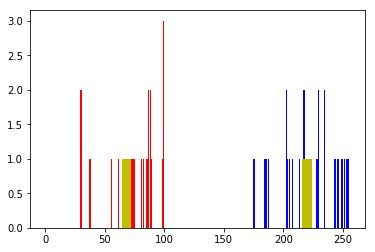

In [4]:
# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()

#### Multiple Feature Data

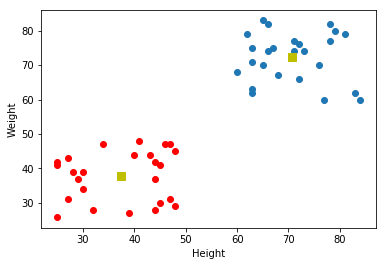

In [5]:
#Arrays X,Y de dimensão (25,2)
# Z recebe os pontos de cada array

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv.kmeans(Z,2,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)


#label.ravel transforma o vetor label de dimensões (50,1) em uma lista
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

#### Color Quantization
###### -> reduzir o número de cores em imagens 

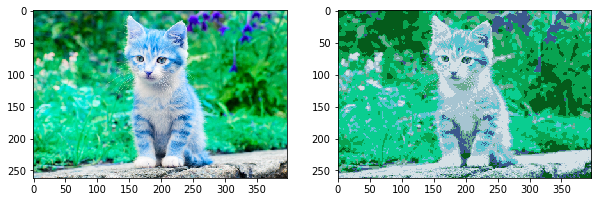

In [6]:
## center sao as 8 cores nao qual a imagem será representada no resultado
## center[label.flatten()] pega o label de cada pixel obtido pelo kmeans e substitui pela cor correspondente aquele label.

img = cv.imread('gato1.png')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)


# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(res2)